## Lab Transformation

Importing packages that we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

Loading data

In [2]:
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
df.head(10)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
5,west region,4745,yes,basic,high school or below,2/14/11,feb,employed,m,50549,...,73,0,7,personal auto,personal l3,offer1,agent,292,four-door car,medsize
6,west region,5035,no,basic,doctor,2/14/11,feb,employed,f,37405,...,99,3,4,corporate auto,corporate l2,offer2,branch,287,four-door car,medsize
7,west region,4956,no,basic,high school or below,2/24/11,feb,employed,m,87197,...,45,0,3,personal auto,personal l2,offer2,branch,247,two-door car,medsize
8,west region,5989,yes,premium,college,1/19/11,jan,employed,m,66839,...,24,0,1,personal auto,personal l1,offer2,branch,739,sports car,medsize
9,north west,17114,no,extended,master,1/4/11,jan,employed,f,70961,...,8,0,2,corporate auto,corporate l3,offer2,agent,408,four-door car,small


In [4]:
df.columns.unique()
# we should change the data type of: 
# customer_lifetime_value, income, monthly_premium_auto, months_since_last_claim, months_since_policy_inception, 
# number_of_open_complaints, number_of_policies, total_claim_amount

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

Creating two df: numerical and categorical data

In [6]:
numerical = df.select_dtypes(include=np.number)

In [7]:
numerical.columns.unique()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [8]:
categorical = df.select_dtypes(include='object') 

In [9]:
categorical.columns.unique()

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

###### check if there are highly correlated features and drop them if there are any.

In [10]:
matrix_num = numerical.corr()
matrix_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [11]:
#Answer: In the numerical values there are not any variables that correlate strongly (<0.9)

###### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [12]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [13]:
# checking for uniqe values in each column
categorical['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [14]:
# converting nominal values
dummies = pd.get_dummies(categorical, columns=['response', 'gender','month','sales_channel', 'region'], drop_first=True)
dummies

,coverage,education,effective_to_date,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,vehicle_class,vehicle_size,response_yes,gender_m,month_jan,sales_channel_branch,sales_channel_call center,sales_channel_web,region_east,region_north west,region_west region
0,basic,college,2/18/11,employed,suburban,married,corporate auto,corporate l3,offer3,four-door car,medsize,0,1,0,0,0,0,0,0,0
1,basic,college,1/18/11,unemployed,suburban,single,personal auto,personal l3,offer4,four-door car,medsize,0,0,1,0,1,0,0,0,1
2,basic,bachelor,2/10/11,employed,suburban,single,personal auto,personal l3,offer3,suv,medsize,0,1,0,0,1,0,1,0,0
3,extended,college,1/11/11,employed,suburban,single,corporate auto,corporate l3,offer2,four-door car,medsize,1,1,1,1,0,0,0,1,0
4,premium,bachelor,1/17/11,medical leave,suburban,married,personal auto,personal l2,offer1,four-door car,medsize,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,unemployed,suburban,married,personal auto,personal l1,offer3,luxury car,medsize,0,0,1,0,0,1,0,0,0
10685,basic,college,1/6/11,employed,urban,married,personal auto,personal l3,offer2,four-door car,medsize,0,0,1,1,0,0,0,1,0
10686,extended,bachelor,2/6/11,employed,rural,married,corporate auto,corporate l3,offer1,luxury suv,medsize,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,employed,urban,divorced,personal auto,personal l1,offer1,suv,medsize,0,0,0,1,0,0,0,0,1


In [15]:
# replacing the dummies


In [16]:
# converting ordinal values

# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
categorical['coverage']= label_encoder.fit_transform(categorical['coverage'])
categorical['coverage'].unique()

array([0, 1, 2])

In [17]:
categorical['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [18]:
# Define a dictionary of category to numerical label mappings
mapping = {'high school or below': 0, 'college': 1, 'bachelor': 2, 'master': 3,'doctor':4}

# Replace the categorical values with numerical labels using the replace() method
categorical['education'] = categorical['education'].replace(mapping)

###### Do the same for the rest of the columns

In [19]:
# Look at all the columns to be changed
categorical.columns.unique()

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [20]:
categorical['employment_status'].unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [21]:
m2 = {'unemployed': 0, 'disabled': 1, 'medical leave': 2, 'retired': 3,'employed':4}
categorical['employment_status'] = categorical['employment_status'].replace(m2)

In [22]:
categorical['location_code'].unique()

array(['suburban', 'urban', 'rural'], dtype=object)

In [23]:
m3 = {'rural': 0, 'suburban': 1, 'urban': 2}
categorical['location_code'] = categorical['location_code'].replace(m3)

In [24]:
categorical['marital_status'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
m4 = {'divorced': 0, 'single': 1, 'married': 2}
categorical['marital_status'] = categorical['marital_status'].replace(m4)

In [26]:
categorical['policy_type']= label_encoder.fit_transform(categorical['policy_type'])
categorical['policy_type'].unique()

array([0, 1, 2])

In [27]:
m5 = {'offer1': 0, 'offer2': 1, 'offer3': 2, 'offer4':3}
categorical['renew_offer_type'] = categorical['renew_offer_type'].replace(m5)
categorical['renew_offer_type'].unique()

array([2, 3, 1, 0])

In [28]:
categorical['sales_channel']= label_encoder.fit_transform(categorical['sales_channel'])
categorical['sales_channel'].unique()

array([0, 2, 1, 3])

In [29]:
categorical['vehicle_class']= label_encoder.fit_transform(categorical['vehicle_class'])
categorical['vehicle_class'].unique()

array([0, 4, 5, 3, 1, 2])

In [30]:
categorical['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [31]:
m6 = {'small': 0, 'medsize': 1, 'large': 2}
categorical['vehicle_size'] = categorical['vehicle_size'].replace(m6)

In [32]:
categorical['policy']= label_encoder.fit_transform(categorical['policy'])
categorical['policy'].unique()

array([2, 5, 4, 1, 3, 6, 0, 8, 7])

In [33]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,0,1,2/18/11,feb,4,m,1,2,0,2,2,0,0,1
1,west region,no,0,1,1/18/11,jan,0,f,1,1,1,5,3,2,0,1
2,east,no,0,2,2/10/11,feb,4,m,1,1,1,5,2,2,4,1
3,north west,yes,1,1,1/11/11,jan,4,m,1,1,0,2,1,1,0,1
4,north west,no,2,2,1/17/11,jan,2,f,1,2,1,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,1/19/11,jan,0,f,1,2,1,3,2,3,1,1
10685,north west,no,0,1,1/6/11,jan,4,f,2,2,1,5,1,1,0,1
10686,central,no,1,2,2/6/11,feb,4,f,0,2,0,2,0,3,2,1
10687,west region,no,2,1,2/13/11,feb,4,f,2,0,1,3,0,1,4,1


In [34]:
cat = pd.concat([categorical, dummies], axis = 1)
cat

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,vehicle_size,response_yes,gender_m,month_jan,sales_channel_branch,sales_channel_call center,sales_channel_web,region_east,region_north west,region_west region
0,central,no,0,1,2/18/11,feb,4,m,1,2,...,medsize,0,1,0,0,0,0,0,0,0
1,west region,no,0,1,1/18/11,jan,0,f,1,1,...,medsize,0,0,1,0,1,0,0,0,1
2,east,no,0,2,2/10/11,feb,4,m,1,1,...,medsize,0,1,0,0,1,0,1,0,0
3,north west,yes,1,1,1/11/11,jan,4,m,1,1,...,medsize,1,1,1,1,0,0,0,1,0
4,north west,no,2,2,1/17/11,jan,2,f,1,2,...,medsize,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,1/19/11,jan,0,f,1,2,...,medsize,0,0,1,0,0,1,0,0,0
10685,north west,no,0,1,1/6/11,jan,4,f,2,2,...,medsize,0,0,1,1,0,0,0,1,0
10686,central,no,1,2,2/6/11,feb,4,f,0,2,...,medsize,0,0,0,0,0,1,0,0,0
10687,west region,no,2,1,2/13/11,feb,4,f,2,0,...,medsize,0,0,0,1,0,0,0,0,1


In [42]:
#combining the 2 data sets 
df2 = pd.concat([cat, numerical], axis = 1)
df2.head(100)

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,...,region_north west,region_west region,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,central,no,0,1,2/18/11,feb,4,m,1,2,...,0,0,4809,48029,61,7,52,0,9,292
1,west region,no,0,1,1/18/11,jan,0,f,1,1,...,0,1,2228,92260,64,3,26,0,1,744
2,east,no,0,2,2/10/11,feb,4,m,1,1,...,0,0,14947,22139,100,34,31,0,2,480
3,north west,yes,1,1,1/11/11,jan,4,m,1,1,...,1,0,22332,49078,97,10,3,0,2,484
4,north west,no,2,2,1/17/11,jan,2,f,1,2,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,east,no,0,1,2/24/11,feb,0,f,1,1,...,0,0,7294,62548,113,12,66,2,7,733
96,north west,no,1,1,1/29/11,jan,4,m,0,1,...,1,0,3289,40097,92,23,35,4,1,227
97,north west,no,0,3,2/14/11,feb,4,f,0,1,...,1,0,2505,60546,63,21,71,0,1,46
98,central,no,1,0,1/25/11,jan,4,f,2,2,...,0,0,3417,72460,85,9,76,0,1,370


In [43]:
# We will drop effective to date since it does not add value to the analysis
df3 = df2.drop('effective_to_date', axis = 1)
df3

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,...,region_north west,region_west region,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,central,no,0,1,feb,4,m,1,2,0,...,0,0,4809,48029,61,7,52,0,9,292
1,west region,no,0,1,jan,0,f,1,1,1,...,0,1,2228,92260,64,3,26,0,1,744
2,east,no,0,2,feb,4,m,1,1,1,...,0,0,14947,22139,100,34,31,0,2,480
3,north west,yes,1,1,jan,4,m,1,1,0,...,1,0,22332,49078,97,10,3,0,2,484
4,north west,no,2,2,jan,2,f,1,2,1,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,2,2,jan,0,f,1,2,1,...,0,0,15563,61541,253,12,40,0,7,1214
10685,north west,no,0,1,jan,4,f,2,2,1,...,1,0,5259,61146,65,7,68,0,6,273
10686,central,no,1,2,feb,4,f,0,2,0,...,0,0,23893,39837,201,11,63,0,2,381
10687,west region,no,2,1,feb,4,f,2,0,1,...,0,1,11971,64195,158,0,27,4,6,618


In [44]:
df3.columns.unique()

Index(['region', 'response', 'coverage', 'education', 'month',
       'employment_status', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'response_yes', 'gender_m',
       'month_jan', 'sales_channel_branch', 'sales_channel_call center',
       'sales_channel_web', 'region_east', 'region_north west',
       'region_west region', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

### (Optional Task)

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

In [51]:
# Begin by visually examining distributions (histograms) of the numerical features.
num3 = df3.select_dtypes(include=np.number)

array([[<AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'employment_status'}>,
        <AxesSubplot:title={'center':'location_code'}>,
        <AxesSubplot:title={'center':'marital_status'}>],
       [<AxesSubplot:title={'center':'policy_type'}>,
        <AxesSubplot:title={'center':'policy'}>,
        <AxesSubplot:title={'center':'renew_offer_type'}>,
        <AxesSubplot:title={'center':'sales_channel'}>,
        <AxesSubplot:title={'center':'vehicle_class'}>],
       [<AxesSubplot:title={'center':'vehicle_size'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'gender_m'}>,
        <AxesSubplot:title={'center':'month_jan'}>,
        <AxesSubplot:title={'center':'sales_channel_branch'}>],
       [<AxesSubplot:title={'center':'sales_channel_call center'}>,
        <AxesSubplot:title={'center':'sales_channel_web'}>,
        <AxesSubplot:title={'center':'regio

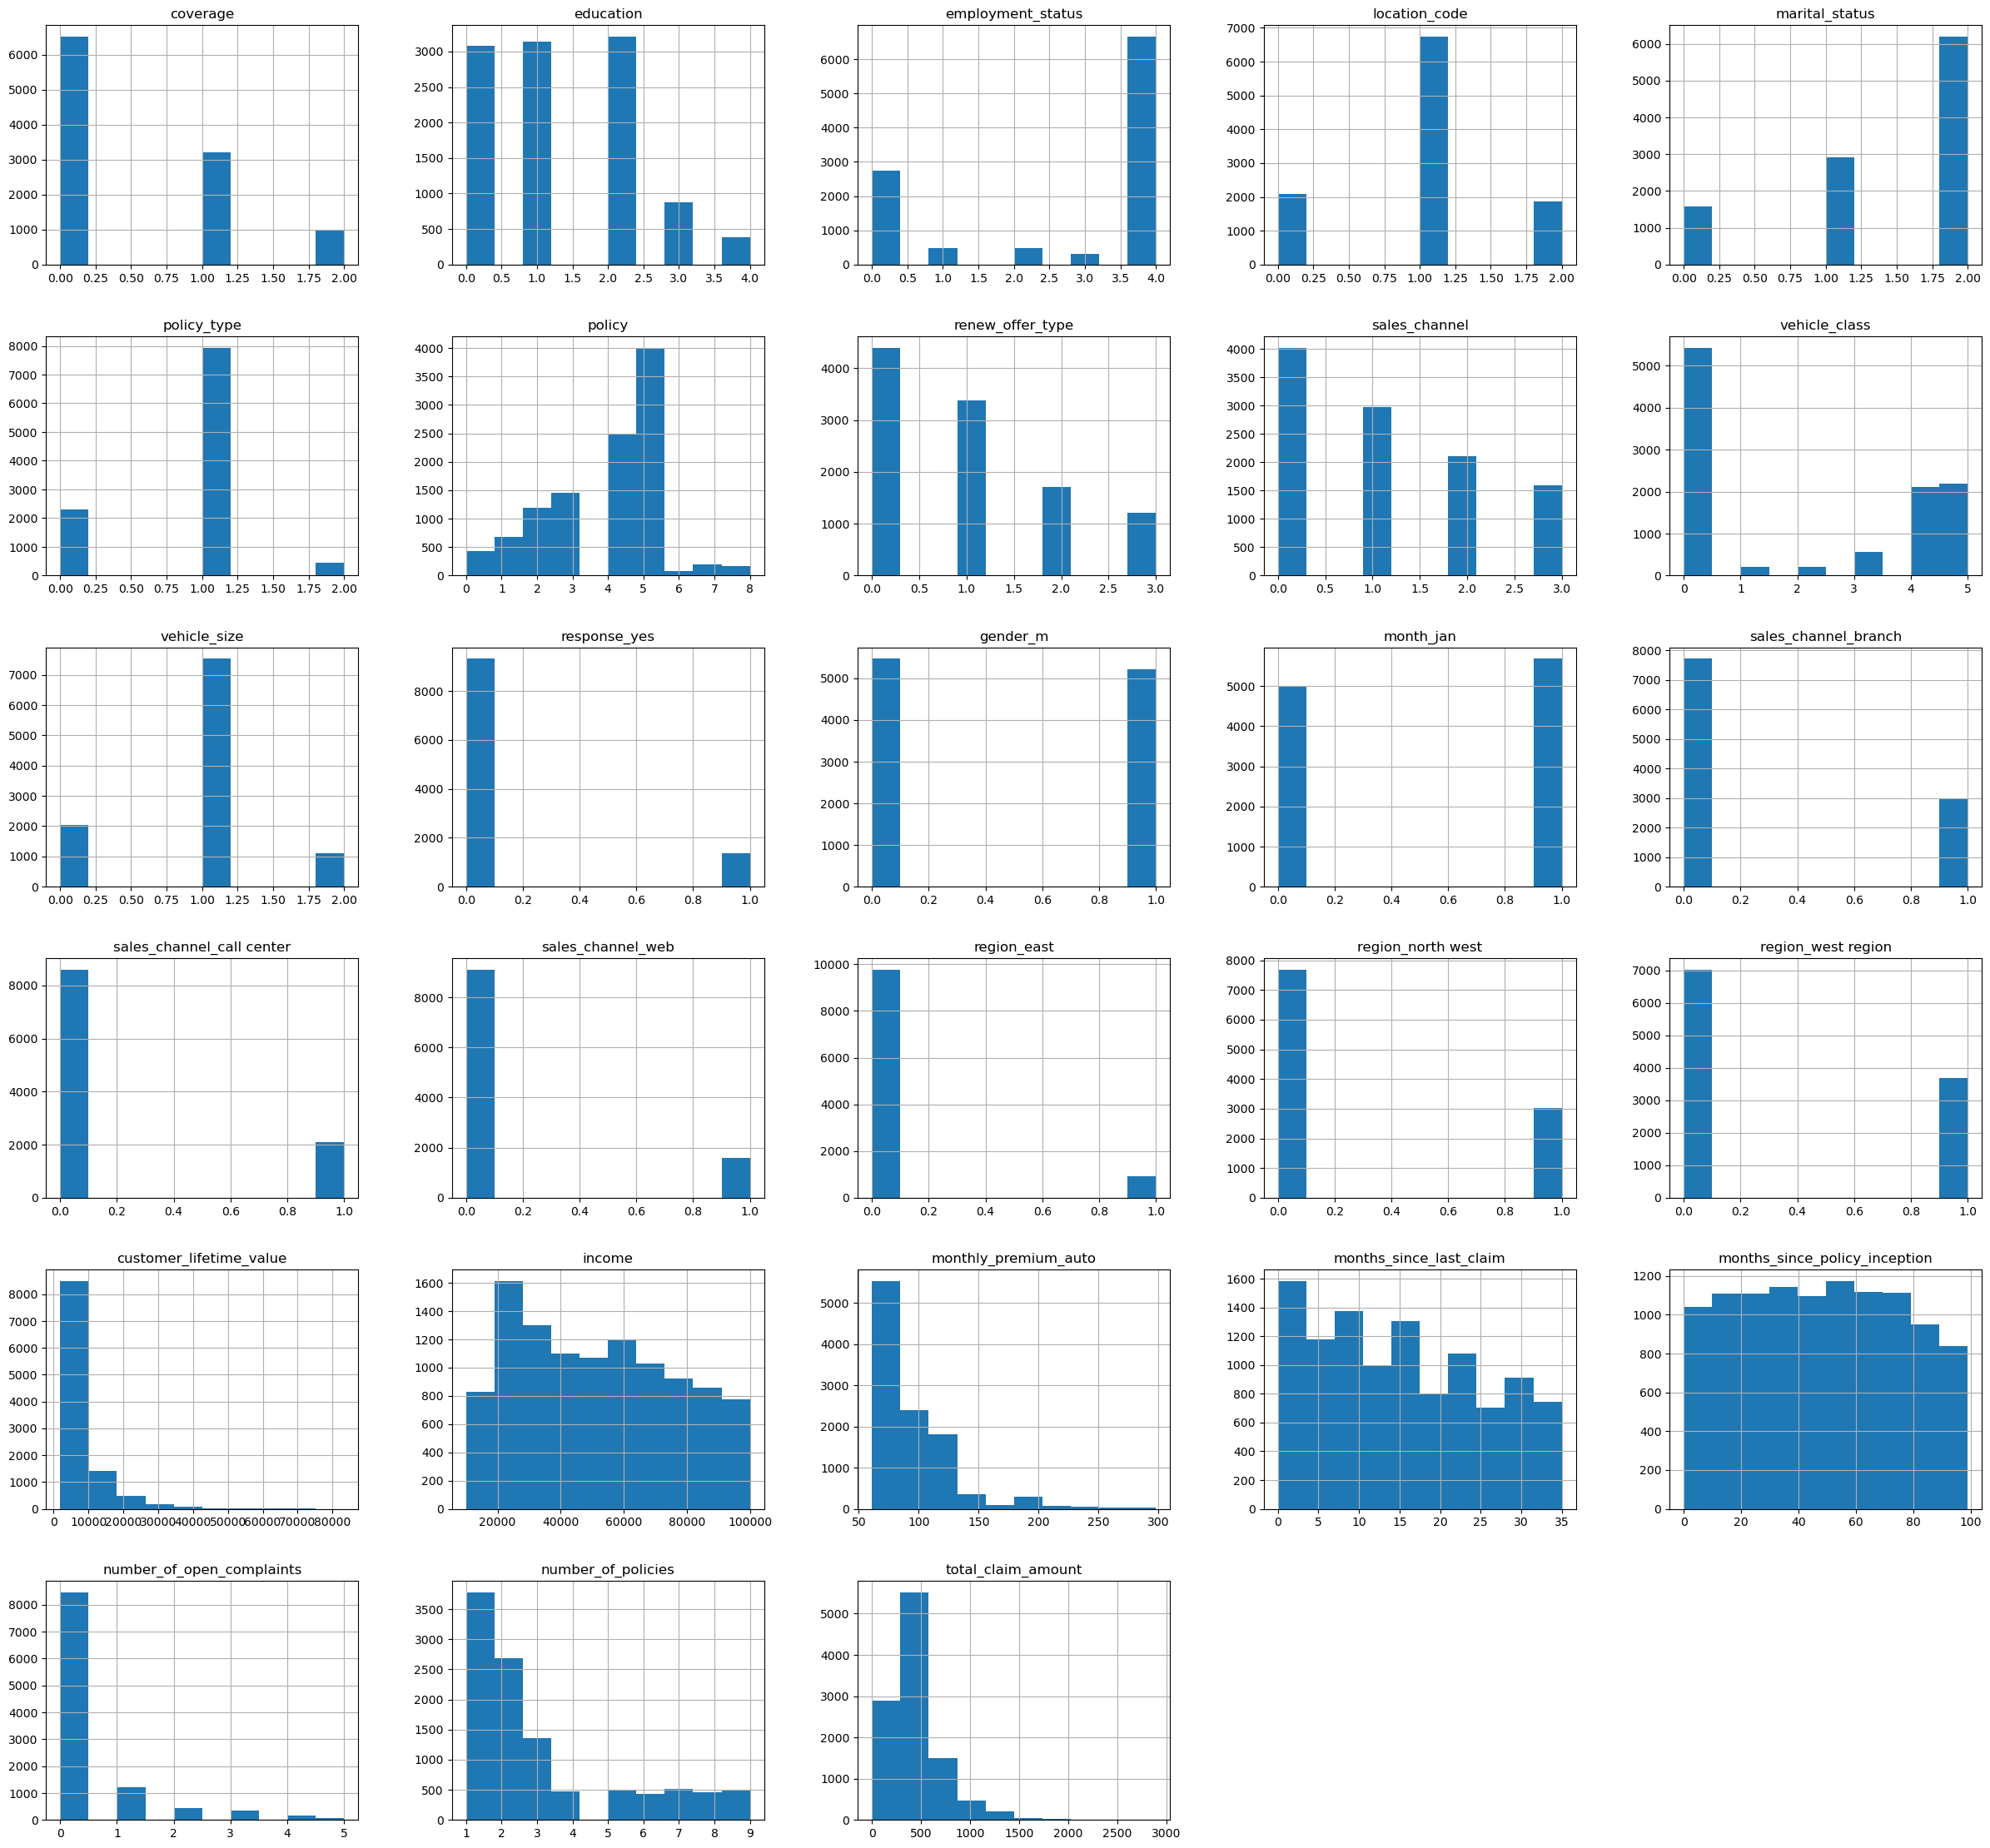

In [52]:
num3.hist(figsize=(30,28))

In [ ]:
# Select a variable, call it varA, which takes on a wide range of numerical values
# Answer: customer_lifetime_value has a wide range of num values

# varB, which has a noticeably large skew
# Answer: total_claim_amount

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a distplot or a histogram
varB
Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [89]:
varA = df3['customer_lifetime_value']
varA = varA.values.reshape(-1, 1)
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

In [90]:
# Fit the scaler to the dataset
scaler.fit(varA)

MinMaxScaler()

In [82]:
# Transform the dataset using the scaler
varA_scaled = scaler.transform(varA)
varA_scaled

array([[0.03574981],
       [0.00405271],
       [0.16025397],
       ...,
       [0.27011925],
       [0.1237059 ],
       [0.06090118]])

(array([2.196e+03, 2.133e+03, 1.756e+03, 1.449e+03, 9.630e+02, 4.210e+02,
        3.480e+02, 2.700e+02, 2.250e+02, 1.350e+02, 1.080e+02, 1.150e+02,
        1.080e+02, 7.600e+01, 7.300e+01, 5.000e+01, 3.300e+01, 3.600e+01,
        3.600e+01, 2.000e+01, 3.200e+01, 1.800e+01, 1.300e+01, 1.000e+01,
        1.700e+01, 8.000e+00, 7.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

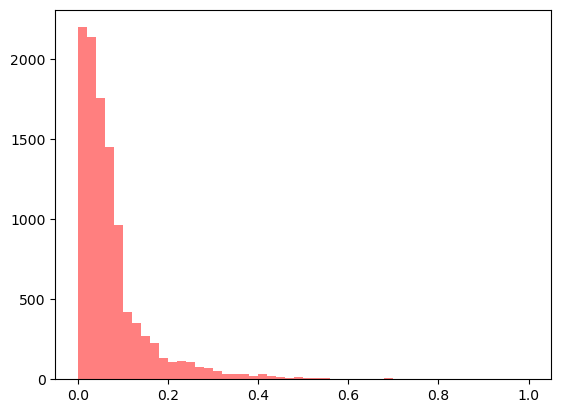

In [83]:
# Scaled varA
plt.hist(varA_scaled, bins=50, color='red', alpha=0.5, label='Scaled')

(array([2.196e+03, 2.133e+03, 1.756e+03, 1.449e+03, 9.630e+02, 4.210e+02,
        3.480e+02, 2.700e+02, 2.250e+02, 1.350e+02, 1.080e+02, 1.150e+02,
        1.080e+02, 7.600e+01, 7.300e+01, 5.000e+01, 3.300e+01, 3.600e+01,
        3.600e+01, 2.000e+01, 3.200e+01, 1.800e+01, 1.300e+01, 1.000e+01,
        1.700e+01, 8.000e+00, 7.000e+00, 5.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1898.  ,  3526.54,  5155.08,  6783.62,  8412.16, 10040.7 ,
        11669.24, 13297.78, 14926.32, 16554.86, 18183.4 , 19811.94,
        21440.48, 23069.02, 24697.56, 26326.1 , 27954.64, 29583.18,
        31211.72, 32840.26, 34468.8 , 36097.34, 37725.88, 39354.42,
        40982.96, 42611.5 , 44240.04, 45868.58, 47497.12, 49125.66,
        50754.2 , 52382.74, 54011.28

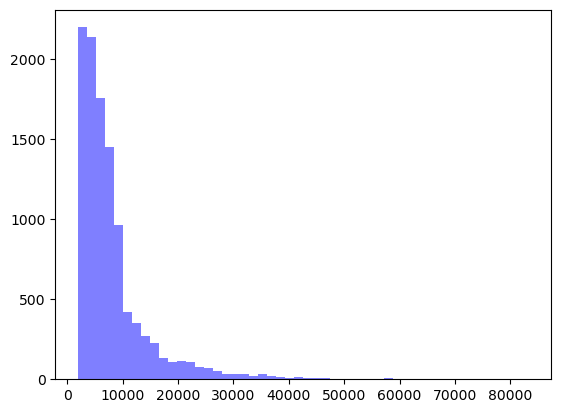

In [84]:
# Original varA
plt.hist(varA, bins=50, color='blue', alpha=0.5, label='Original')

In [87]:
# varB Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution
from sklearn.preprocessing import StandardScaler

# Create an instance of the MinMaxScaler
Scaler2 = StandardScaler()

In [88]:
varB = df3['total_claim_amount']
varB = varB.values.reshape(-1, 1)

In [91]:
# Fit the scaler to the dataset
scaler.fit(varB)

MinMaxScaler()

In [92]:
# Transform the dataset using the scaler
varB_scaled = scaler.transform(varB)
varB_scaled

array([[0.10093329],
       [0.25717249],
       [0.16591773],
       ...,
       [0.1316972 ],
       [0.21361908],
       [0.35292084]])

(array([5.900e+02, 6.080e+02, 5.880e+02, 5.320e+02, 5.710e+02, 1.819e+03,
        9.620e+02, 9.080e+02, 1.005e+03, 8.290e+02, 4.740e+02, 3.750e+02,
        2.460e+02, 2.460e+02, 1.650e+02, 1.340e+02, 1.370e+02, 9.100e+01,
        5.300e+01, 4.600e+01, 5.100e+01, 3.800e+01, 4.500e+01, 4.300e+01,
        3.700e+01, 1.400e+01, 1.100e+01, 1.000e+01, 3.000e+00, 4.000e+00,
        8.000e+00, 9.000e+00, 1.000e+00, 1.000e+01, 4.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 

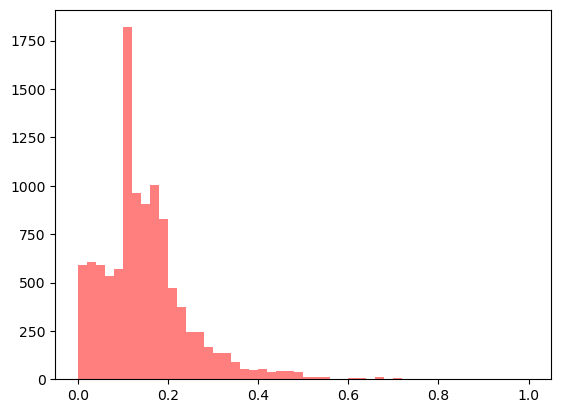

In [93]:
# Scaled varB
plt.hist(varB_scaled, bins=50, color='red', alpha=0.5, label='Scaled')

(array([5.900e+02, 6.080e+02, 5.880e+02, 5.320e+02, 5.710e+02, 1.819e+03,
        9.620e+02, 9.080e+02, 1.005e+03, 8.290e+02, 4.740e+02, 3.750e+02,
        2.460e+02, 2.460e+02, 1.650e+02, 1.340e+02, 1.370e+02, 9.100e+01,
        5.300e+01, 4.600e+01, 5.100e+01, 3.800e+01, 4.500e+01, 4.300e+01,
        3.700e+01, 1.400e+01, 1.100e+01, 1.000e+01, 3.000e+00, 4.000e+00,
        8.000e+00, 9.000e+00, 1.000e+00, 1.000e+01, 4.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0.  ,   57.86,  115.72,  173.58,  231.44,  289.3 ,  347.16,
         405.02,  462.88,  520.74,  578.6 ,  636.46,  694.32,  752.18,
         810.04,  867.9 ,  925.76,  983.62, 1041.48, 1099.34, 1157.2 ,
        1215.06, 1272.92, 1330.78, 1388.64, 1446.5 , 1504.36, 1562.22,
        1620.08, 1677.94, 1735.8 , 1793.66, 1851.52, 1909.38, 1967.24,
        2025.1 , 2082

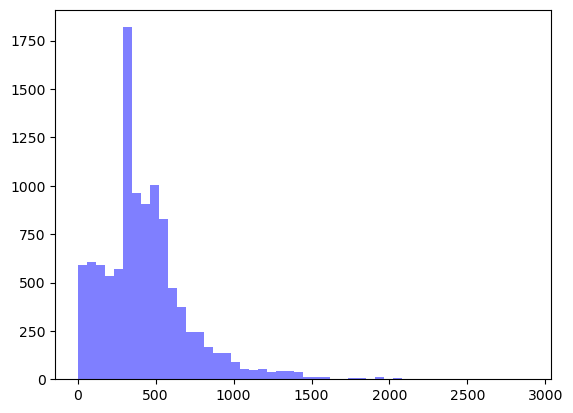

In [94]:
# Original varB
plt.hist(varB, bins=50, color='blue', alpha=0.5, label='Original')

In [95]:
# Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.